In [3]:
from __future__ import division
import csv
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp

In [4]:
#Reading csv values
df = pd.read_csv(r'Dataset/heart_edited.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,130,204,0,2,202,0,0.0,2,0,2,0
1,34,1,1,118,182,0,2,174,0,0.0,2,0,2,0
2,34,0,2,118,210,0,0,192,0,0.7,2,0,2,0
3,35,0,4,138,183,0,0,182,0,1.4,2,0,2,0
4,35,1,4,120,198,0,0,130,1,1.6,1,0,3,1


In [5]:
#Convert question marks to values
df['ca'] = df['ca'].replace('?', 0)
df['thal'] = df['thal'].replace('?', 150)

In [6]:
x_df=df.iloc[1:df.shape[0],0:13]
print(x_df)

y_df=df.iloc[1:df.shape[0],13:14]
print(y_df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     34    1   1       118   182    0        2      174      0      0.0   
2     34    0   2       118   210    0        0      192      0      0.7   
3     35    0   4       138   183    0        0      182      0      1.4   
4     35    1   4       120   198    0        0      130      1      1.6   
5     35    1   4       126   282    0        2      156      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   71    0   3       110   265    1        2      130      0      0.0   
299   71    0   4       112   149    0        0      125      0      1.6   
300   74    0   2       120   269    0        2      121      1      0.2   
301   76    0   3       140   197    0        1      116      0      1.1   
302   77    1   4       125   304    0        2      162      1      0.0   

     slope ca thal  
1        2  0    2  
2        2  0    2  
3        2  0    2  
4  

In [7]:
# converting dataframe into arrays
x=np.array(x_df)
y=np.array(y_df)

KFold(n_splits=5, random_state=None, shuffle=True)

TEST: [  3   7   8   9  19  25  44  45  50  56  57  60  67  75  84  89  96 102
 107 109 111 112 132 134 138 139 144 146 147 149 152 155 159 162 165 171
 173 174 181 189 200 201 204 208 209 211 214 221 243 245 247 248 251 258
 260 267 270 271 298 299 300]
Gaussian Naive Bayes model accuracy(in %): 86.88524590163934
Confusion Matrix
[[31  3]
 [ 5 22]]
Precision
0.869471766848816
Recall
0.8688524590163934
F1 Score
0.8682039272203208
ROC Curve


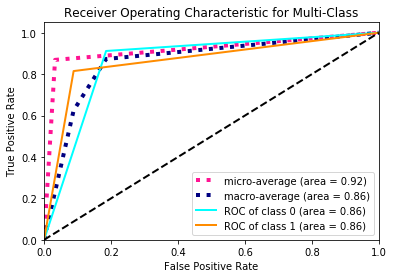


TEST: [ 12  27  30  40  41  42  43  46  47  53  62  74  76  78  81  86  88 100
 103 108 110 113 116 119 122 125 133 135 136 137 140 153 157 163 170 172
 178 180 184 186 188 198 202 203 216 222 223 224 227 228 239 249 252 253
 255 262 264 266 281 284 289]
Gaussian Naive Bayes model accuracy(in %): 77.04918032786885
Confusion Matrix
[[30  5]
 [ 9 17]]
Precision
0.770721082196492
Recall
0.7704918032786885
F1 Score
0.767131885984345
ROC Curve


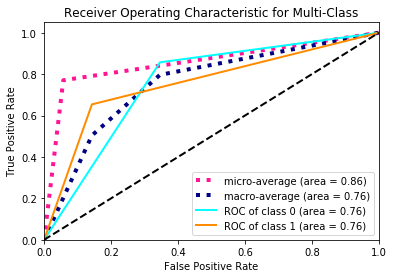


TEST: [  0   2  13  17  20  21  22  23  24  26  31  32  38  55  59  65  66  68
  69  70  73  77  80  82  95  97 104 106 120 128 129 130 142 148 150 156
 175 176 183 187 193 195 199 205 219 229 234 242 246 259 265 268 272 275
 276 285 286 294 295 301]
Gaussian Naive Bayes model accuracy(in %): 85.0
Confusion Matrix
[[30  5]
 [ 4 21]]
Precision
0.8512443438914027
Recall
0.85
F1 Score
0.8503836317135549
ROC Curve


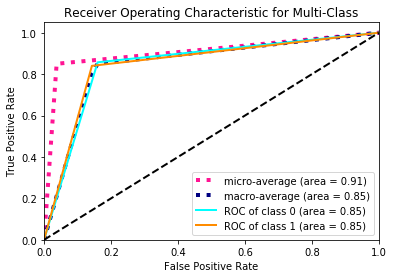


TEST: [  5   6  11  34  36  39  48  49  71  72  79  83  85  91  94  98  99 101
 114 115 118 121 123 126 141 143 145 151 154 158 161 164 169 177 179 185
 194 197 210 213 215 220 225 230 232 233 236 240 241 261 274 278 279 282
 283 287 291 293 296 297]
Gaussian Naive Bayes model accuracy(in %): 81.66666666666667
Confusion Matrix
[[28  3]
 [ 8 21]]
Precision
0.8247685185185186
Recall
0.8166666666666667
F1 Score
0.8148596639444288
ROC Curve


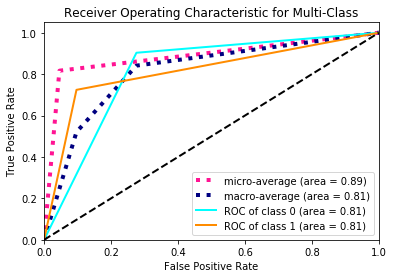


TEST: [  1   4  10  14  15  16  18  28  29  33  35  37  51  52  54  58  61  63
  64  87  90  92  93 105 117 124 127 131 160 166 167 168 182 190 191 192
 196 206 207 212 217 218 226 231 235 237 238 244 250 254 256 257 263 269
 273 277 280 288 290 292]
Gaussian Naive Bayes model accuracy(in %): 80.0
Confusion Matrix
[[20  8]
 [ 4 28]]
Precision
0.8037037037037038
Recall
0.8
F1 Score
0.7981900452488688
ROC Curve


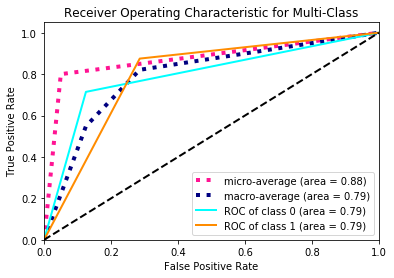

[86.88524590163934, 77.04918032786885, 85.0, 81.66666666666667, 80.0]
Max: 86.88524590163934
Min: 77.04918032786885
Avg: 82.12021857923497


In [9]:
# prepare cross validation
accuracy_scores = []
kf = KFold(5, True)
kf.get_n_splits(x)
print(kf)
# enumerate splits
for train_index, test_index in kf.split(x):
#     print("TRAIN:", train_index, "TEST:", test_index)
    print("\nTEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Gaussian function of sklearn
    gnb = GaussianNB()
    gnb.fit(x_train, y_train.ravel())
    y_pred = gnb.predict(x_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred)*100)
    print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
    # convert 2D array to 1D array
    y1=y_test.ravel()
    y_pred1=y_pred.ravel()
    #A confusion matrix is a summary of prediction results on a classification problem.
    #The number of correct and incorrect predictions are summarized with count values and broken down by each class.
    #TP - FN
    #FP - TN
    print("Confusion Matrix")
    cf_matrix=confusion_matrix(y1,y_pred1)
    print(cf_matrix)
    #F1 score = 2*((precision*recall)/(precision+recall))
    #Precision = Number of True Positives divided by the number of True Positives and False Positives.
    #Recall = Number of True Positives divided by the number of True Positives and the number of False Negatives
    print("Precision")
    precision=precision_score(y1,y_pred1,average='weighted')
    print(precision)
    print("Recall")
    recall=recall_score(y1,y_pred1,average='weighted')
    print(recall)
    print("F1 Score")
    f_score=f1_score(y1,y_pred1,average='weighted')
    print(f_score)
    # Matrix from 1D array
    y2=np.zeros(shape=(len(y1),5))
    y3=np.zeros(shape=(len(y_pred1),5))
    for i in range(len(y1)):
        y2[i][int(y1[i])]=1
    for i in range(len(y_pred1)):
        y3[i][int(y_pred1[i])]=1
    # ROC Curve generation
    n_classes = 2

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y2[:, i], y3[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y2.ravel(), y3.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    print("ROC Curve")
    # First aggregate all false positive rates
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-Class')
    plt.legend(loc="lower right")
    plt.show()

print(accuracy_scores)
max_value = max(accuracy_scores)
min_value = min(accuracy_scores)
avg_value = sum(accuracy_scores)/len(accuracy_scores)
print('Max:', max_value)
print('Min:',min_value)
print('Avg:',avg_value)

In [94]:
#eli5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases 
#when a feature is not available;

#Permutation importance is calculated after a model has been fitted. So we won't change the model or change what predictions 
#we'd get for a given value. Instead we will ask the following question: If I randomly shuffle a single column of the 
#validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions 
#in that now-shuffled data?

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(gnb, random_state = 1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_df.columns.tolist())

Weight,Feature
0.0533 ± 0.1041,ca
0.0300 ± 0.0389,slope
0.0300 ± 0.0800,exang
0.0267 ± 0.0452,sex
0.0233 ± 0.0618,cp
0.0100 ± 0.0267,restecg
0.0000 ± 0.0211,fbs
0 ± 0.0000,thal
-0.0033 ± 0.0827,oldpeak
-0.0033 ± 0.0490,thalach


In [98]:
# So, it looks like the most important factors in terms of permutation are:
# 1) Number of major vessels coloured by fluoroscopy. 
# 2) Slope of peak exercise ST segment
# 3) Exercise induced angina
# 4) Sex
# 5) Chest Pain Type

In [57]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=None)
# # Gaussian function of sklearn
# gnb = GaussianNB()
# gnb.fit(x_train, y_train.ravel())
# y_pred = gnb.predict(x_test)

In [58]:
# print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

In [59]:
print(y_test)

[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [60]:
# convert 2D array to 1D array
y1=y_test.ravel()
y_pred1=y_pred.ravel()

In [61]:
print(y1)

[0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1
 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1]


In [62]:
#A confusion matrix is a summary of prediction results on a classification problem.
#The number of correct and incorrect predictions are summarized with count values and broken down by each class.
#TP - FN
#FP - TN
print("Confusion Matrix")
cf_matrix=confusion_matrix(y1,y_pred1)
print(cf_matrix)

Confusion Matrix
[[14 16]
 [ 3 27]]


In [63]:
#F1 score = 2*((precision*recall)/(precision+recall))
#Precision = Number of True Positives divided by the number of True Positives and False Positives.
#Recall = Number of True Positives divided by the number of True Positives and the number of False Negatives
print("F1 Score")
f_score=f1_score(y1,y_pred1,average='weighted')
print(f_score)

F1 Score
0.667735354124162


In [64]:
# Matrix from 1D array
y2=np.zeros(shape=(len(y1),5))
y3=np.zeros(shape=(len(y_pred1),5))
for i in range(len(y1)):
    y2[i][int(y1[i])]=1

for i in range(len(y_pred1)):
    y3[i][int(y_pred1[i])]=1

print(y2,"\n\nY3 now\n\n", y3)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0.

ROC Curve


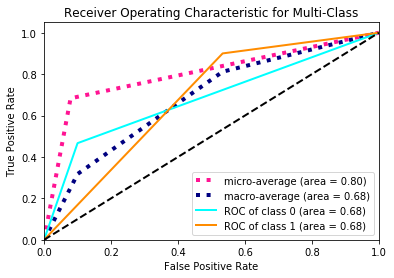

In [65]:
# ROC Curve generation
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2[:, i], y3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y2.ravel(), y3.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
print("ROC Curve")
# First aggregate all false positive rates
lw=2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()